In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import json
from matplotlib import pyplot as plt

In [2]:
def read_file(filename):
    loc= '/home/bansal/Downloads/' + filename + ".txt"
    print (loc)
    txtfile= open(loc, 'r')
    lines= txtfile.read().split(' ')
    array= []
    for num in lines:
        if(len(num)> 0):
            array.append(float(num))
    return array
        
        

In [ ]:
def read_json(filename):
    loc= '/home/bansal/Downloads/' + filename + '.json'
    print (loc)
    scores= []
    count= 0
    for comment in open(loc, 'r'):
        scores.append(abs(int(json.loads(comment)['ups'])))#nice
    return scores

In [ ]:
def get_mean(array):
    count= 0
    for num in array:
        if(num!= 0.0):
            count+= 1
    print (count)
    return np.sum(array)/count


In [ ]:
def get_median(array):
    array2= []
    for i in array:
        if(i!= 0.0):
            array2.append(i)
    return np.median(array2)

In [ ]:
def create_discourse(filename):
    loc= '/home/bansal/Downloads/' + filename + '.json'
    actualdiscourse= []
    obsdiscourse= read_file('elaborationdiscourse')
    print (len(obsdiscourse))
    count= 0
    df= pd.read_csv('/home/bansal/Downloads/subreddits_basic.csv')
    for post in open(loc, 'r'):
        text= json.loads(post)
        subreddit= text['subreddit']
        subs= df.loc[df['reddit']== subreddit, 'subs'].values
        for subpost in text['posts']:
            if('majority_type' in subpost and subpost['majority_type']== 'elaboration'):
                if(len(subs)> 0 and subs[0]!= 'None' and int(subs[0])!= 0):
                    actualdiscourse.append(1)
                else:
                    actualdiscourse.append(0)
    print (len(actualdiscourse))
    return actualdiscourse
    

In [ ]:
def get_correlation(virality, formality):
    return np.corrcoef(virality, formality)
    

/home/bansal/Downloads/elaborationdiscoursevirality3.txt
/home/bansal/Downloads/elaborationdiscourse3.txt
14354
14354
For elaboration: -0.8692863579239916
/home/bansal/Downloads/agreementdiscoursevirality3.txt
/home/bansal/Downloads/agreementdiscourse3.txt
3571
3571
For agreement: -1.2849937034514936
/home/bansal/Downloads/disagreementdiscoursevirality3.txt
/home/bansal/Downloads/disagreementdiscourse3.txt
2439
2439
For disagreement: -0.6772467158417337
/home/bansal/Downloads/appreciationdiscoursevirality3.txt
/home/bansal/Downloads/appreciationdiscourse3.txt
6459
6459
For appreciation: -1.5248715188159898


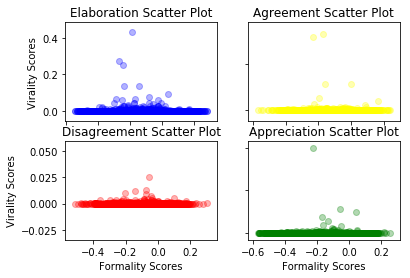

In [3]:
vir= read_file('elaborationdiscoursevirality3')
scores= read_file('elaborationdiscourse3')
print (len(vir))
print (len(scores))
print ("For elaboration: " + str(r2_score(scores, vir)))
fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(scores, vir, c= 'blue', alpha= 0.3)
axs[0,0].set_title('Elaboration Scatter Plot')
vir= read_file('agreementdiscoursevirality3')
scores= read_file("agreementdiscourse3")
print (len(vir))
print (len(scores))
print ("For agreement: " + str(r2_score(scores, vir)))
axs[0,1].scatter(scores, vir, c= 'yellow', alpha= 0.3)
axs[0,1].set_title('Agreement Scatter Plot')
vir= read_file('disagreementdiscoursevirality3')
scores= read_file('disagreementdiscourse3')
print (len(vir))
print (len(scores))
print ("For disagreement: " + str(r2_score(scores, vir)))
axs[1,0].scatter(scores, vir, c= 'red', alpha= 0.3)
axs[1,0].set_title('Disagreement Scatter Plot')
vir= read_file('appreciationdiscoursevirality3')
scores= read_file('appreciationdiscourse3')
print (len(vir))
print (len(scores))
print ("For appreciation: " + str(r2_score(scores, vir)))
axs[1,1].scatter(scores, vir, c= 'green', alpha= 0.3)
axs[1,1].set_title('Appreciation Scatter Plot')


for ax in axs.flat:
    ax.set(xlabel='Formality Scores', ylabel='Virality Scores')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('./third.png')